![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

**Predicción de gasto por deterioro en las sociedades fiduciarias**

**Métodos estadísticos para analítica de datos** <br>

Docente: Luis Andrés Campos Maldonado <br>
Facultad de Ingeniería y Ciencias Básicas <br>
Universidad Central <br>

__GRUPO 4__ <br>
- Daniel Mauricio Cardenas<br>
- Luisa Fernanda Rodriguez

In [1]:
# Cargar el archivo utils.py, este archivo contiene las librerias necesarias y algunos modulos a utilizar en el proceso

from utils import *

/home/danielcardenas/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:

import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'https://raw.githubusercontent.com/LordOnion88/MAD/refs/heads/main/Series%20de%20Tiempo/Proyecto/base%20ajustada.csv'
df = pd.read_csv(file_path)
df

,FECHA_CORTE,Ingresos,Deterioro
0,31/01/2016,12556235614,456212289
1,29/02/2016,11948803346,426440399
2,31/03/2016,12124055034,507291741
3,30/04/2016,12268361877,132621564
4,31/05/2016,22885166819,488187217
...,...,...,...
99,30/04/2024,27195720063,11441164891
100,31/05/2024,23126998775,86331878
101,30/06/2024,29758712102,95378649
102,31/07/2024,36122438899,113647065


In [4]:
#Validar el tipo de datos de cada columna y si tiene datos nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FECHA_CORTE  104 non-null    object
 1   Ingresos     104 non-null    int64 
 2   Deterioro    104 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


In [5]:
df['FECHA_CORTE'] = pd.to_datetime(df['FECHA_CORTE'])

/tmp/ipykernel_6473/2928885864.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['FECHA_CORTE'] = pd.to_datetime(df['FECHA_CORTE'])


In [6]:
# Ajustar el df para que sea una serie de tiempo

df.index = df['FECHA_CORTE'] # Definir la columna fecha como index
df.drop(columns=['FECHA_CORTE'],inplace=True) # Eliminar la columna fecha
df

,Ingresos,Deterioro
FECHA_CORTE,,
2016-01-31,12556235614,456212289
2016-02-29,11948803346,426440399
2016-03-31,12124055034,507291741
2016-04-30,12268361877,132621564
2016-05-31,22885166819,488187217
...,...,...
2024-04-30,27195720063,11441164891
2024-05-31,23126998775,86331878
2024-06-30,29758712102,95378649


In [ ]:
df_gasto = df.copy()
df_gasto = df_gasto.drop(['Ingresos'], axis = 1)
df_gasto

,Deterioro
FECHA_CORTE,
2016-01-31,456212289
2016-02-29,426440399
2016-03-31,507291741
2016-04-30,132621564
2016-05-31,488187217
...,...
2024-04-30,11441164891
2024-05-31,86331878
2024-06-30,95378649


# Entendimiento de los datos

- Graficar la serie de tiempo original
- Descomponer la serie de tiempo original

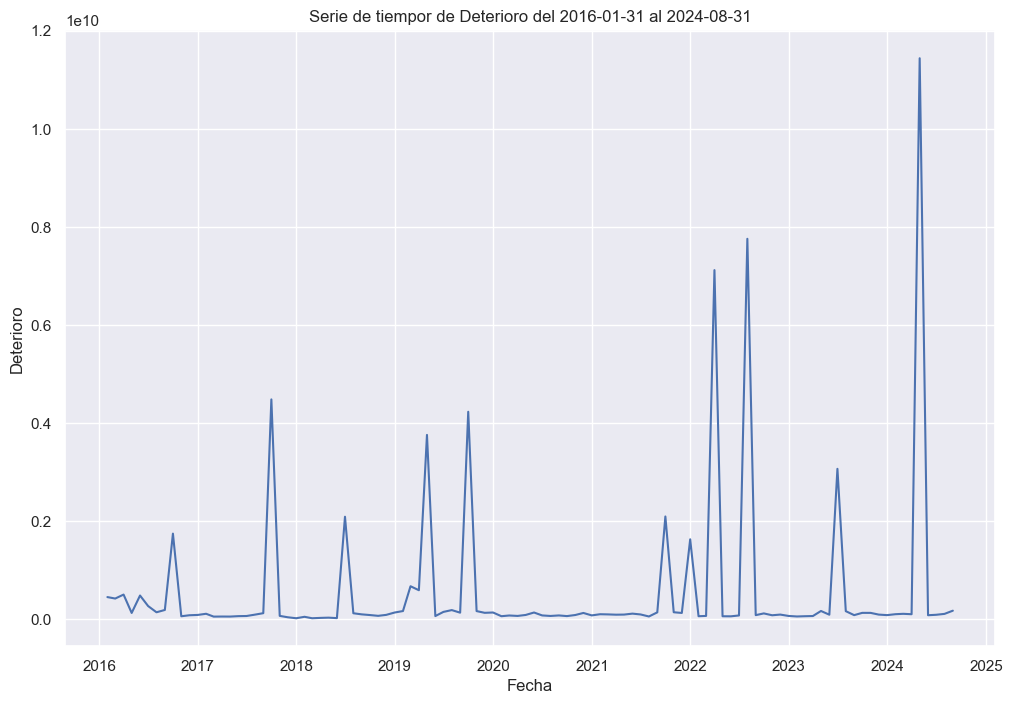

In [9]:
serie_de_tiempo(df_gasto,'Deterioro')

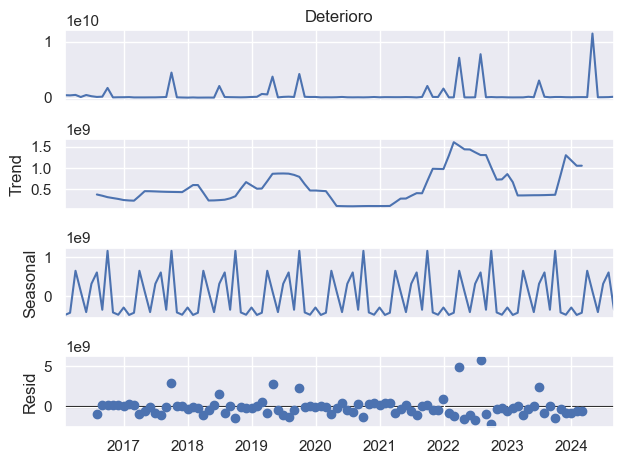

In [60]:
Serie_decompuesta = seasonal_decompose (df_gasto['Deterioro'],model = 'additive', period= 12)
grafico1 = Serie_decompuesta.plot()

## Analisis Exploratorio de los Datos



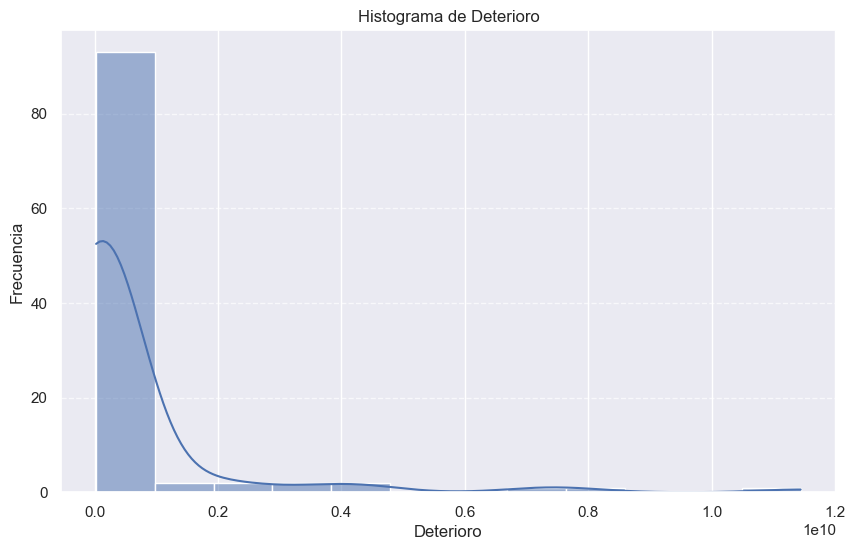

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(df_gasto['Deterioro'], bins=12, kde=True)
plt.title('Histograma de Deterioro')
plt.xlabel('Deterioro')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle = '--', alpha = 0.7)
plt.show()

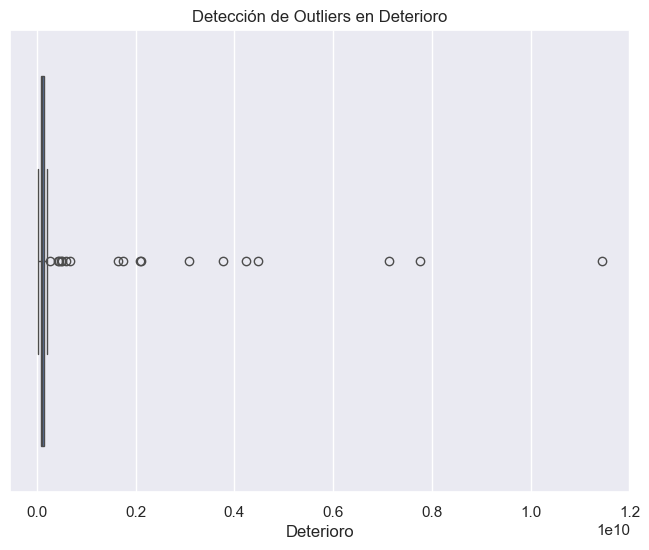

In [63]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_gasto['Deterioro'])
plt.title('Detección de Outliers en Deterioro')
plt.show()

In [58]:
print(df_gasto['Deterioro'].describe())

count    1.040000e+02
mean     5.898848e+08
std      1.662141e+09
min      2.466401e+07
25%      7.217045e+07
50%      1.008496e+08
75%      1.487325e+08
max      1.144116e+10
Name: Deterioro, dtype: float64


matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


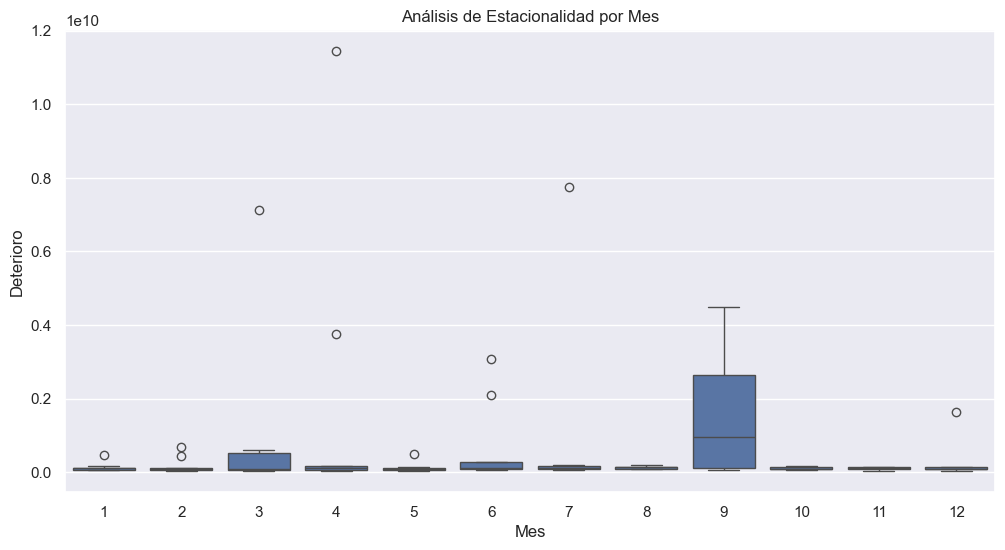

In [64]:
df['Mes'] = df_gasto.index.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mes', y='Deterioro', data=df)
plt.title('Análisis de Estacionalidad por Mes')
plt.xlabel('Mes')
plt.ylabel('Deterioro')
plt.show()

# Modelos SARIMA

Aplicar la metodologia Box Jenkins


## Identificación

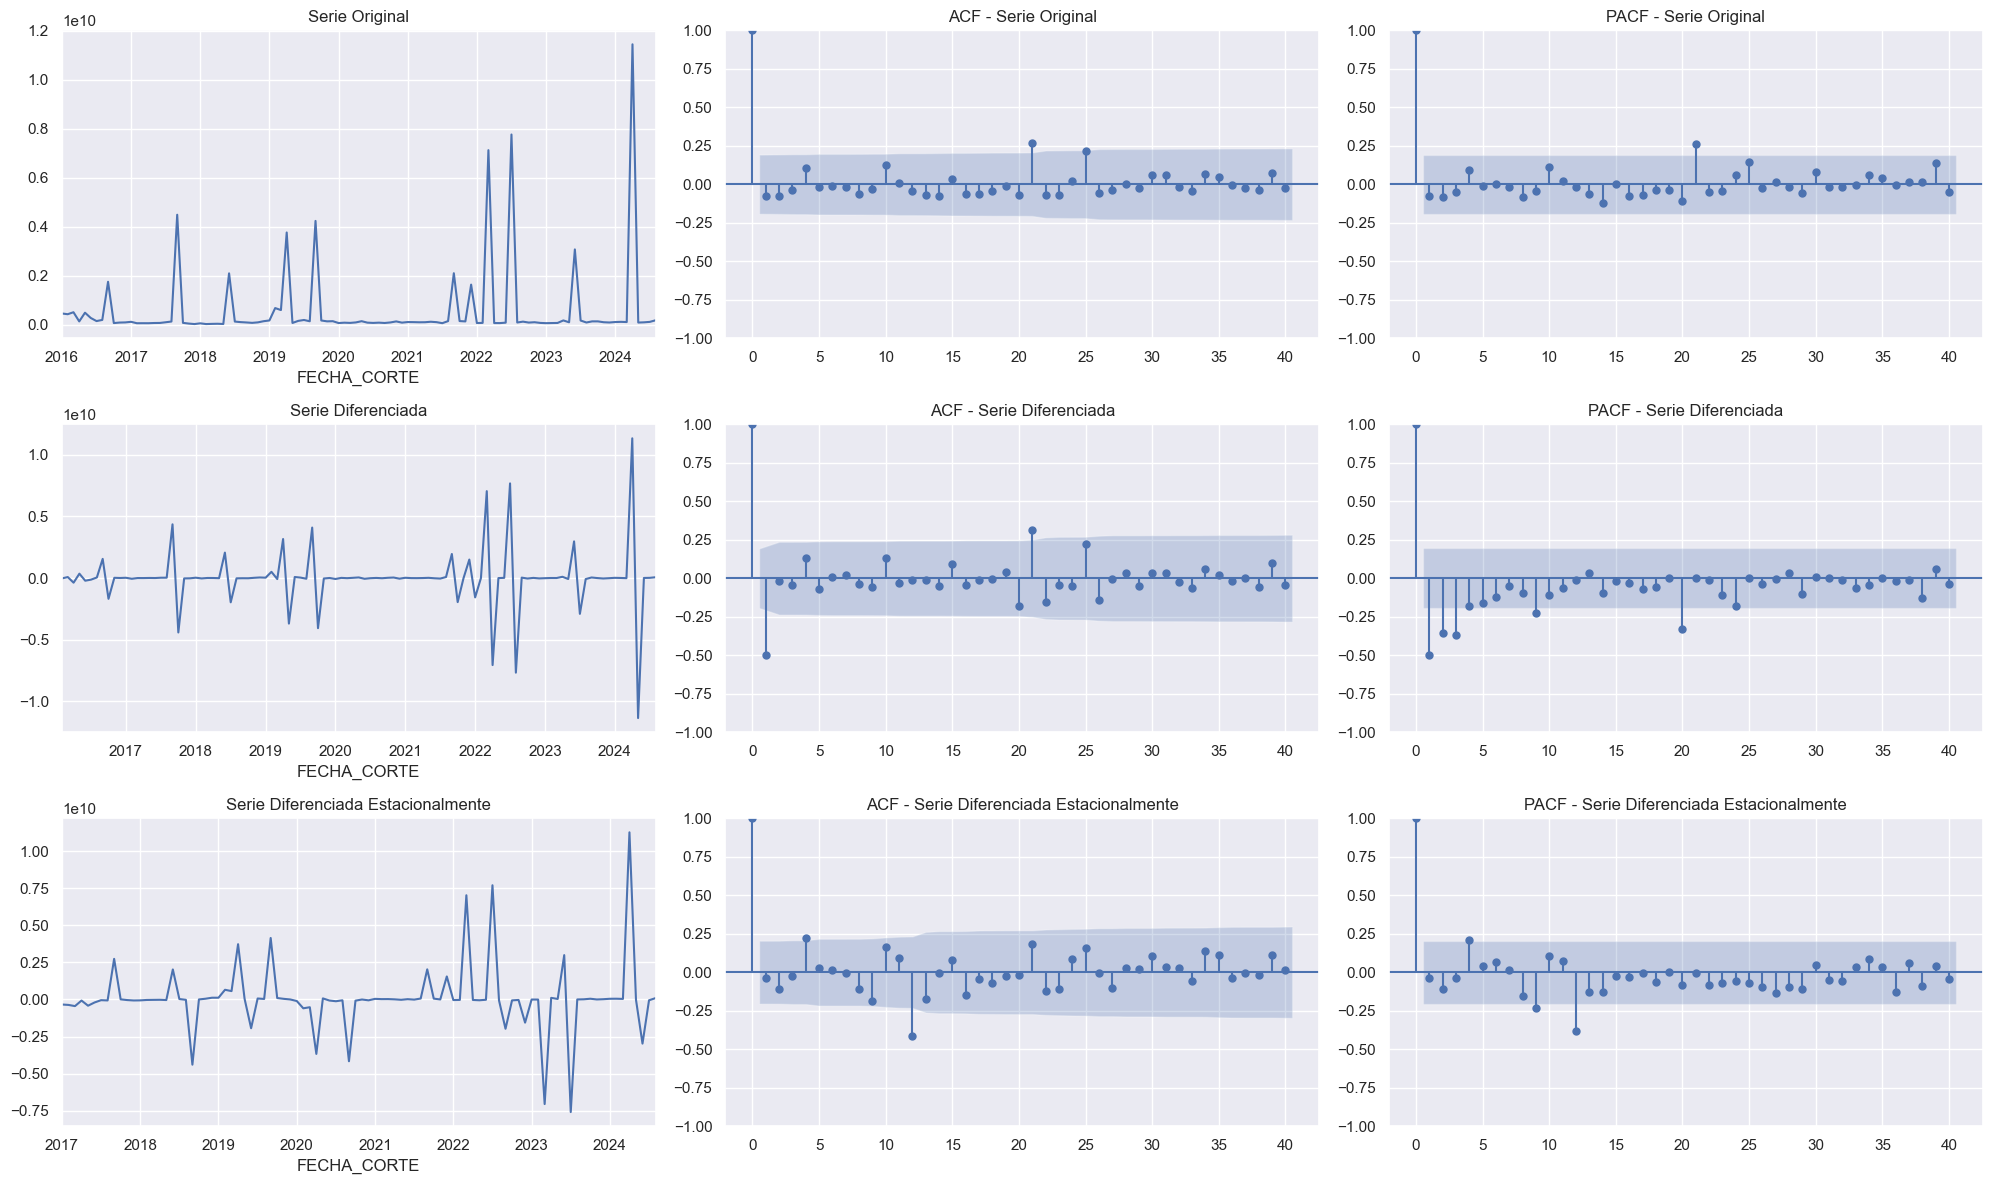

In [11]:
plot_time_series_analysis(df_gasto,'Deterioro')

In [12]:
# prueba de Dickey Fuller para las series

from statsmodels.tsa.stattools import adfuller

SerieOriginal_adf = adfuller(df_gasto['Deterioro'])

print('ADF Statistic:', SerieOriginal_adf[0])
print('p-value:', SerieOriginal_adf[1])
print('Critical Values:')
for key, value in SerieOriginal_adf[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -10.874711679195515
p-value: 1.3407643854465213e-19
Critical Values:
	1%: -3.4954932834550623
	5%: -2.8900369024285117
	10%: -2.5819706975209726


In [15]:
SerieDiferenciada_adf = adfuller(df_gasto['Deterioro'].diff().dropna())

print('ADF Statistic:', SerieDiferenciada_adf[0])
print('p-value:', SerieDiferenciada_adf[1])
print('Critical Values:')
for key, value in SerieDiferenciada_adf[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -5.733713573923513
p-value: 6.511041465680049e-07
Critical Values:
	1%: -3.5019123847798657
	5%: -2.892815255482889
	10%: -2.583453861475781


In [16]:
SerieDiferenciadaEst_adf = adfuller(df_gasto['Deterioro'].diff(12).dropna())

print('ADF Statistic:', SerieDiferenciadaEst_adf[0])
print('p-value:', SerieDiferenciadaEst_adf[1])
print('Critical Values:')
for key, value in SerieDiferenciadaEst_adf[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -3.9817659236867238
p-value: 0.0015090581486291463
Critical Values:
	1%: -3.5148692050781247
	5%: -2.8984085156250003
	10%: -2.58643890625


In [17]:
Entrenamiento_df= df_gasto[:98]
Prueba_df= df_gasto[98:]

display(Prueba_df,Entrenamiento_df)

,Deterioro
FECHA_CORTE,
2024-03-31,106828590
2024-04-30,11441164891
2024-05-31,86331878
2024-06-30,95378649
2024-07-31,113647065
2024-08-31,178815394


,Deterioro
FECHA_CORTE,
2016-01-31,456212289
2016-02-29,426440399
2016-03-31,507291741
2016-04-30,132621564
2016-05-31,488187217
...,...
2023-10-31,134170404
2023-11-30,99262998
2023-12-31,88546646


In [18]:
!pip install pmdarima
import pmdarima as pm

modelo1 = pm.auto_arima(Entrenamiento_df,seasonal=True,m=12,
                        d=1,D=1,start_p=0,start_q=0, max_p= 4, max_q=4,
                        start_P=0,start_Q=0, max_P= 4, max_Q=4,
                        information_criterion='bic',trace=True, error_action='ignore',suppress_warnings=True,stepwise=True)

/bin/bash: línea 1: pip: orden no encontrada
Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,1,0)[12]             : BIC=3949.783, Time=0.24 sec
 ARIMA(1,1,0)(1,1,0)[12]             : BIC=3892.192, Time=0.94 sec
 ARIMA(0,1,1)(0,1,1)[12]             : BIC=3866.987, Time=1.71 sec
 ARIMA(0,1,1)(0,1,0)[12]             : BIC=inf, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : BIC=3866.660, Time=1.60 sec
 ARIMA(0,1,1)(1,1,0)[12]             : BIC=3864.445, Time=1.47 sec
 ARIMA(0,1,1)(2,1,0)[12]             : BIC=3866.687, Time=2.70 sec
 ARIMA(0,1,1)(2,1,1)[12]             : BIC=3871.088, Time=5.58 sec
 ARIMA(0,1,0)(1,1,0)[12]             : BIC=inf, Time=0.19 sec
 ARIMA(1,1,1)(1,1,0)[12]             : BIC=3868.000, Time=1.60 sec
 ARIMA(0,1,2)(1,1,0)[12]             : BIC=3871.966, Time=1.67 sec
 ARIMA(1,1,2)(1,1,0)[12]             : BIC=3874.459, Time=5.26 sec
 ARIMA(0,1,1)(1,1,0)[12] intercept   : BIC=3869.411, Time=0.94 sec

Best model:  ARIMA(0,1,1)(1,1,0)[12]          
Tot

In [19]:
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   98
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood               -1925.558
Date:                             Sun, 03 Nov 2024   AIC                           3857.117
Time:                                     13:07:05   BIC                           3864.445
Sample:                                 01-31-2016   HQIC                          3860.064
                                      - 02-29-2024                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9637      0.123     -7.803      0.000      -1.206      -0.722
ar.S.L12      -0.8188      0.196     -4.184      0.000      -1.202      -0.435
sigma2        4.6e+18        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               713.46
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               3.28   Skew:                             3.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.89e+54. Standard errors may be unstable.
"""

## Predicción


In [20]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo_SM = SARIMAX(Entrenamiento_df,order=(0,1,1),seasonal=(1,1,0,12))
modeloSM_fit = modelo_SM.fit(disp=0)
modeloSM_fit.summary()

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Deterioro   No. Observations:                   98
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2176.139
Date:                Sun, 03 Nov 2024   AIC                           4356.279
Time:                        13:07:23   BIC                           4361.428
Sample:                    01-31-2016   HQIC                          4358.361
                         - 02-29-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9904      0.104     -9.484      0.000      -1.195      -0.786
sigma2       2.01e+18    5.2e-20   3.86e+37      0.000    2.01e+18    2.01e+18
===================================================================================
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):              1202.85
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               4.67   Skew:                             3.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [21]:
Pr_stmodels = modeloSM_fit.get_forecast(steps=6).predicted_mean
print ( Pr_stmodels)

2024-03-31    5.076411e+08
2024-04-30    5.076411e+08
2024-05-31    5.076411e+08
2024-06-30    5.076411e+08
2024-07-31    5.076411e+08
2024-08-31    5.076411e+08
Freq: ME, Name: predicted_mean, dtype: float64


In [22]:
!pip install skforecast
from skforecast.Sarimax import Sarimax


modelo_SK = Sarimax(order=(0,1,1),seasonal_order=(1,1,0,12))
modelo_SK.fit(y=Entrenamiento_df)
modelo_SK.summary()


/bin/bash: línea 1: pip: orden no encontrada


/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           Deterioro   No. Observations:                   98
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood               -1925.558
Date:                             Sun, 03 Nov 2024   AIC                           3857.117
Time:                                     13:07:38   BIC                           3864.445
Sample:                                 01-31-2016   HQIC                          3860.064
                                      - 02-29-2024                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9637      0.123     -7.803      0.000      -1.206      -0.722
ar.S.L12      -0.8188      0.196     -4.184      0.000      -1.202      -0.435
sigma2        4.6e+18        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               713.46
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               3.28   Skew:                             3.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.89e+54. Standard errors may be unstable.
"""

In [23]:
Pr_skforecast = modelo_SK.predict(steps=6)
print(Pr_skforecast)

                    pred
2024-03-31  5.974519e+09
2024-04-30  2.149660e+08
2024-05-31  2.002180e+08
2024-06-30  7.533376e+08
2024-07-31  6.515147e+09
2024-08-31  2.181804e+08


In [24]:
modelo_PD = pm.ARIMA(order=(0,1,1),seasonal_order=(1,1,0,12))
modelo_PD.fit(y=Entrenamiento_df)
modelo_PD.summary()

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   98
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood               -1925.820
Date:                             Sun, 03 Nov 2024   AIC                           3859.640
Time:                                     13:07:49   BIC                           3869.411
Sample:                                 01-31-2016   HQIC                          3863.570
                                      - 02-29-2024                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.049e+07   1.22e-10   8.59e+16      0.000    1.05e+07    1.05e+07
ma.L1         -0.9166      0.137     -6.698      0.000      -1.185      -0.648
ar.S.L12      -0.8271      0.178     -4.636      0.000      -1.177      -0.477
sigma2        4.6e+18   7.09e-21   6.49e+38      0.000     4.6e+18     4.6e+18
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):               601.01
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               3.26   Skew:                             2.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.15e+54. Standard errors may be unstable.
"""

In [25]:
Pr_pmdarima = modelo_PD.predict(steps=6)
print(Pr_pmdarima)

2024-03-31    6.053141e+09
2024-04-30    2.450243e+08
2024-05-31    2.413816e+08
2024-06-30    7.806057e+08
2024-07-31    6.640177e+09
2024-08-31    2.910830e+08
2024-09-30    3.388208e+08
2024-10-31    3.180110e+08
2024-11-30    3.340716e+08
2024-12-31    3.195201e+08
Freq: ME, dtype: float64


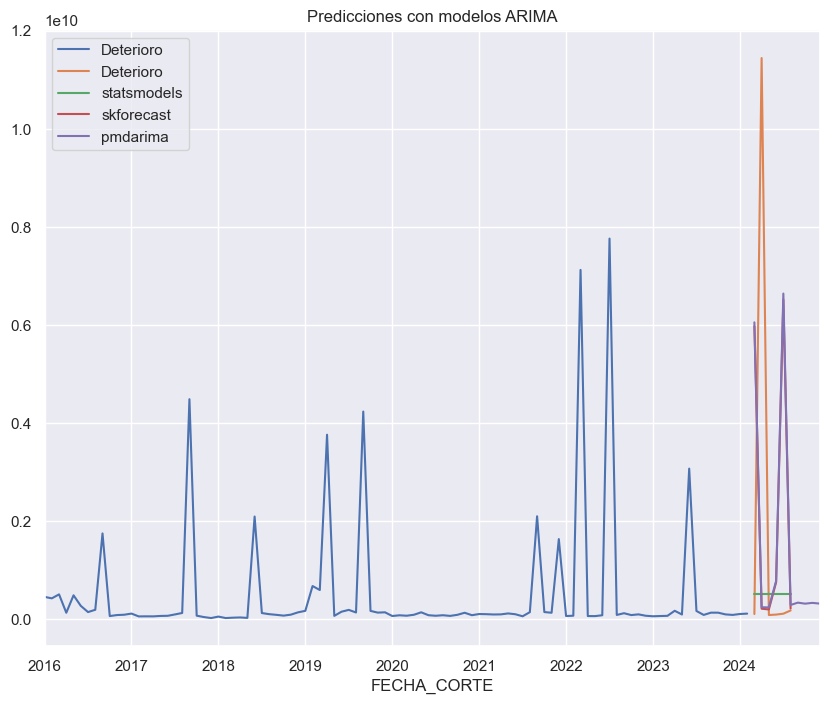

In [26]:
# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(10 , 8))
Entrenamiento_df.plot(ax=ax,label='Entrenamiento')
Prueba_df.plot(ax=ax,label='Prueba')
Pr_stmodels.plot(ax=ax, label='statsmodels')
Pr_skforecast.columns = ['skforecast']
Pr_skforecast.plot(ax=ax, label='skforecast')
Pr_pmdarima.plot(ax=ax, label='pmdarima')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend()

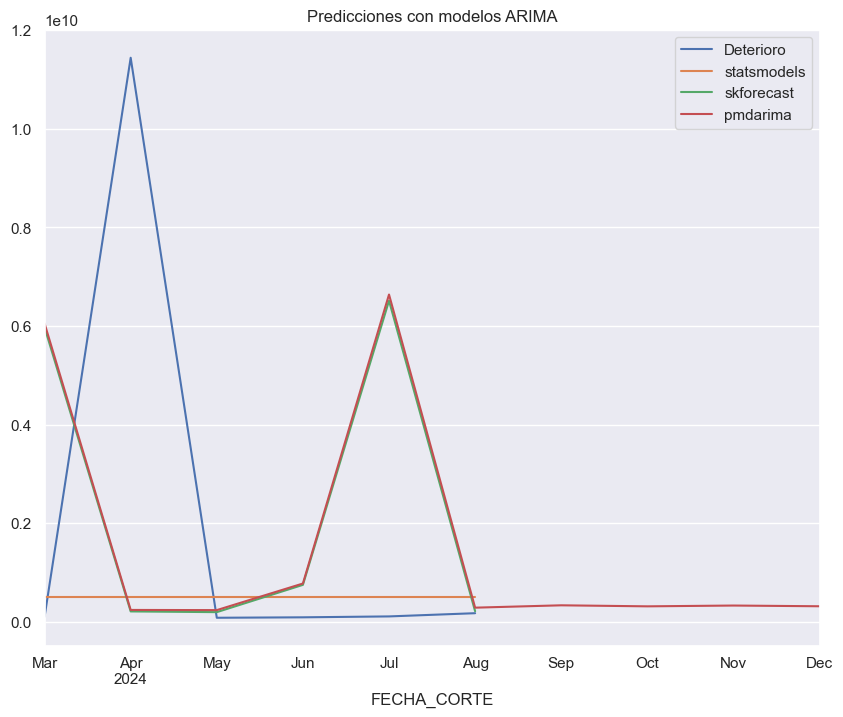

In [27]:
fig, ax = plt.subplots(figsize=(10 , 8))

Prueba_df.plot(ax=ax,label='Prueba')
Pr_stmodels.plot(ax=ax, label='statsmodels')
Pr_skforecast.columns = ['skforecast']
Pr_skforecast.plot(ax=ax, label='skforecast')
Pr_pmdarima.plot(ax=ax, label='pmdarima')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend()


In [29]:
# Medidas

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df["Deterioro"],Pr_skforecast)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df['Deterioro'],Pr_skforecast):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df['Deterioro'],Pr_skforecast):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df['Deterioro'], Pr_skforecast)*100:.2f}%")

MAE 4051099772.78
MSE: 33647325854799429632.00
RMSE: 5800631504.83
MAPE: 2011.22%


In [30]:
# Medidas

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df["Deterioro"],Pr_stmodels)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df['Deterioro'],Pr_stmodels):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df['Deterioro'],Pr_stmodels):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df['Deterioro'], Pr_stmodels)*100:.2f}%")

MAE 2148454604.58
MSE: 20052235497162256384.00
RMSE: 4477972252.84
MAPE: 320.26%


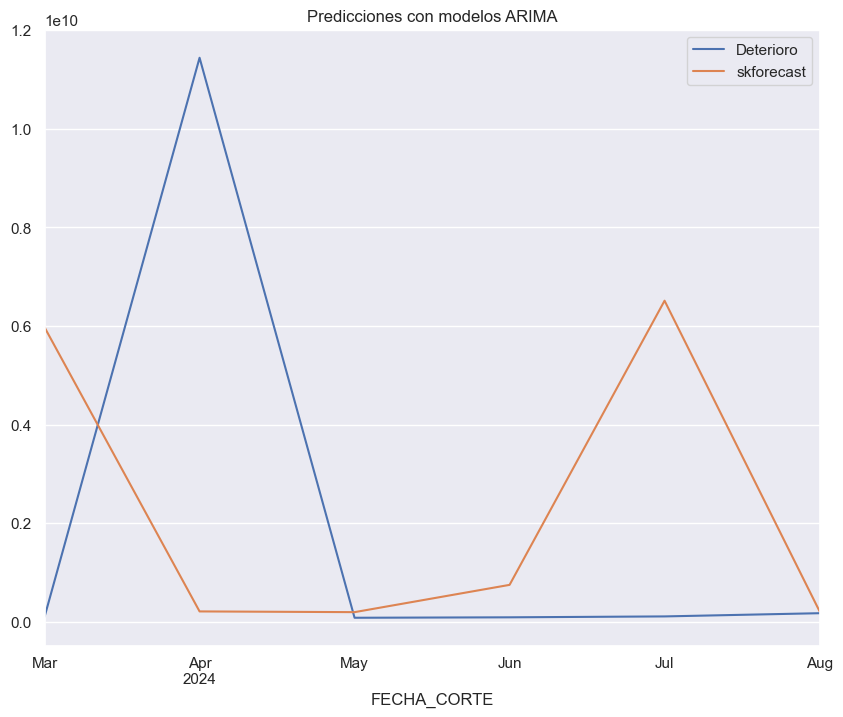

In [34]:
fig, ax = plt.subplots(figsize=(10 , 8))

Prueba_df.plot(ax=ax,label='Prueba')
Pr_skforecast.columns = ['skforecast']
Pr_skforecast.plot(ax=ax, label='skforecast')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend()

# Suavizado Exponencial


/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Suavizado exponencial simple'}, xlabel='FECHA_CORTE'>

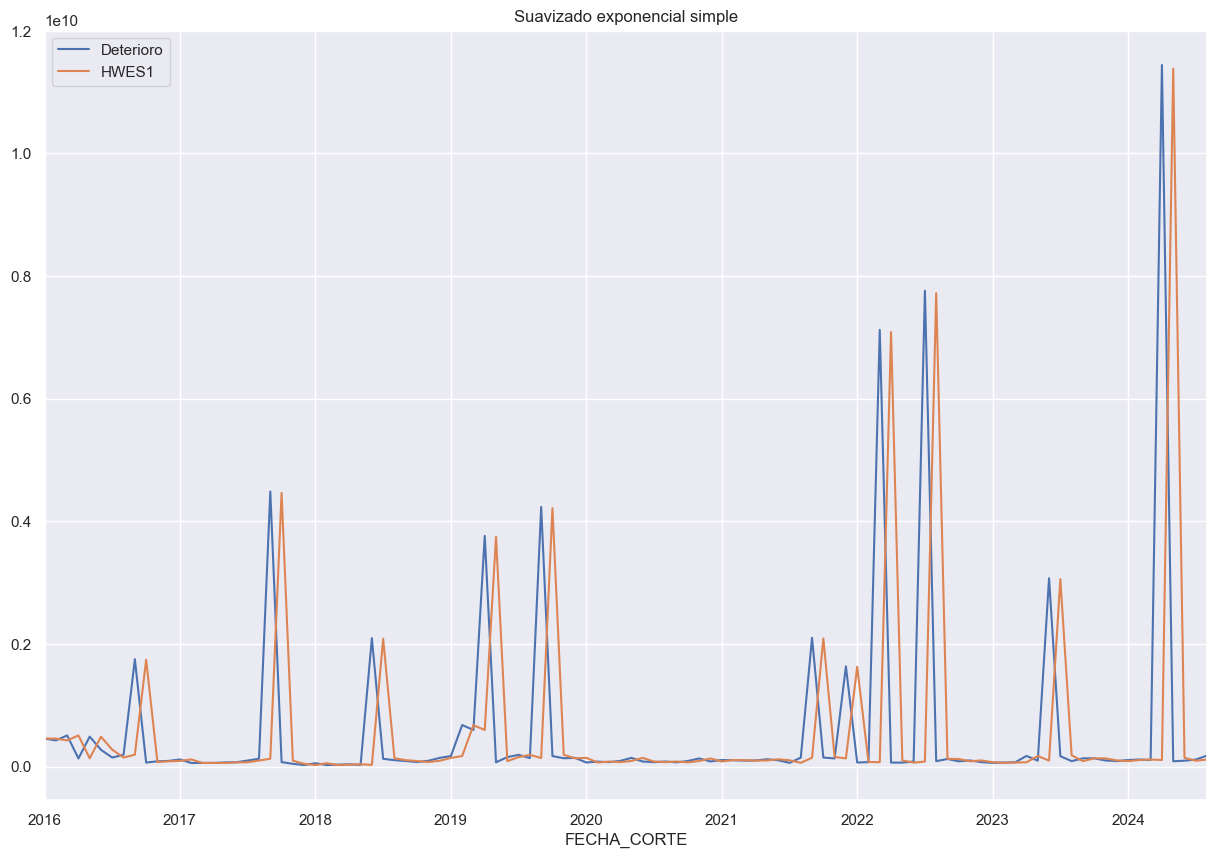

In [35]:
df_s = df_gasto.copy()

#Suavisado Exponencial Simple

df_s['HWES1'] = SimpleExpSmoothing(df_s['Deterioro']).fit(smoothing_level = 0.995, optimized=False,use_brute=True).fittedvalues
df_s[['Deterioro','HWES1']].plot(title = 'Suavizado exponencial simple',figsize=(15,10))

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: title={'center': 'Suavizado exponencial doble'}, xlabel='FECHA_CORTE'>

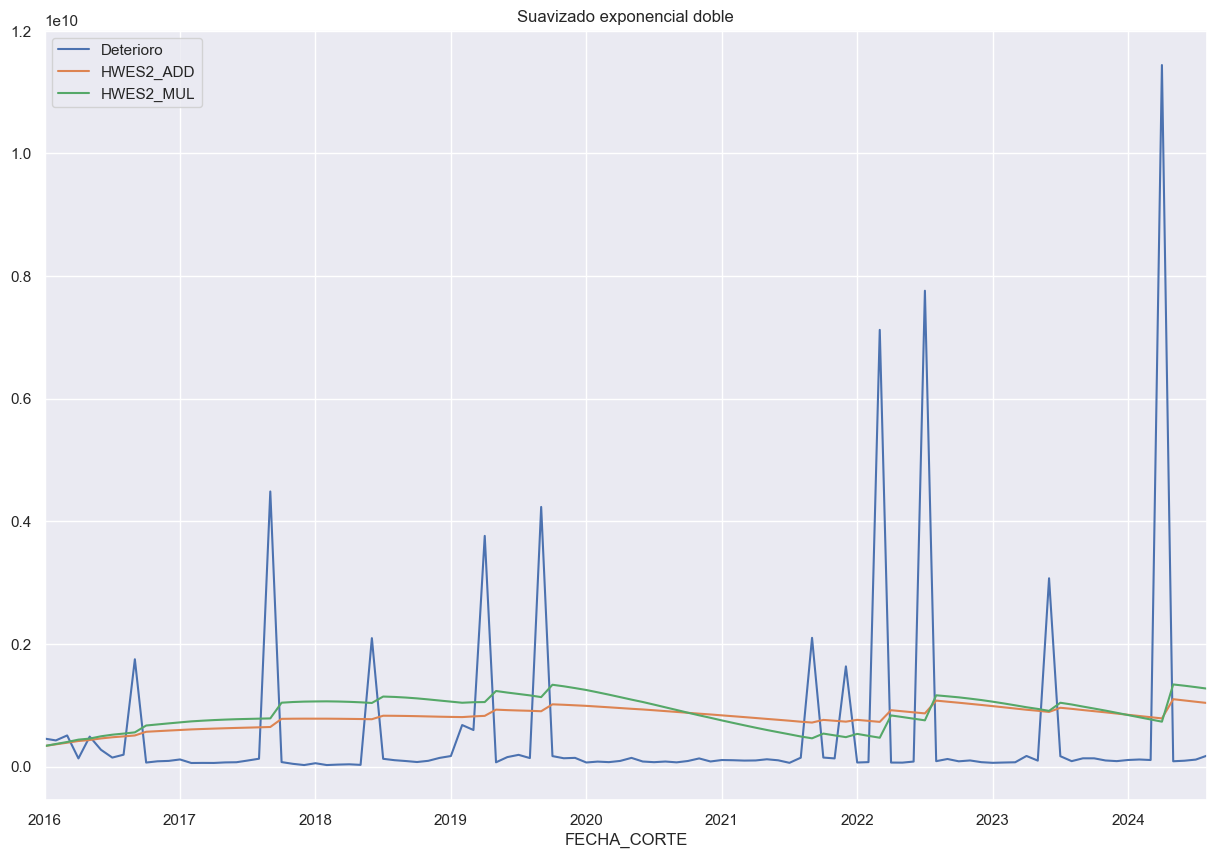

In [36]:
# Suavizado Exponencial doble

df_s['HWES2_ADD'] = ExponentialSmoothing(df_s['Deterioro'],trend='add').fit().fittedvalues
df_s['HWES2_MUL'] = ExponentialSmoothing(df_s['Deterioro'],trend='mul').fit().fittedvalues
df_s[['Deterioro', 'HWES2_ADD','HWES2_MUL']].plot(title = 'Suavizado exponencial doble',figsize=(15,10))

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: title={'center': 'Suavizado exponencial triple'}, xlabel='FECHA_CORTE'>

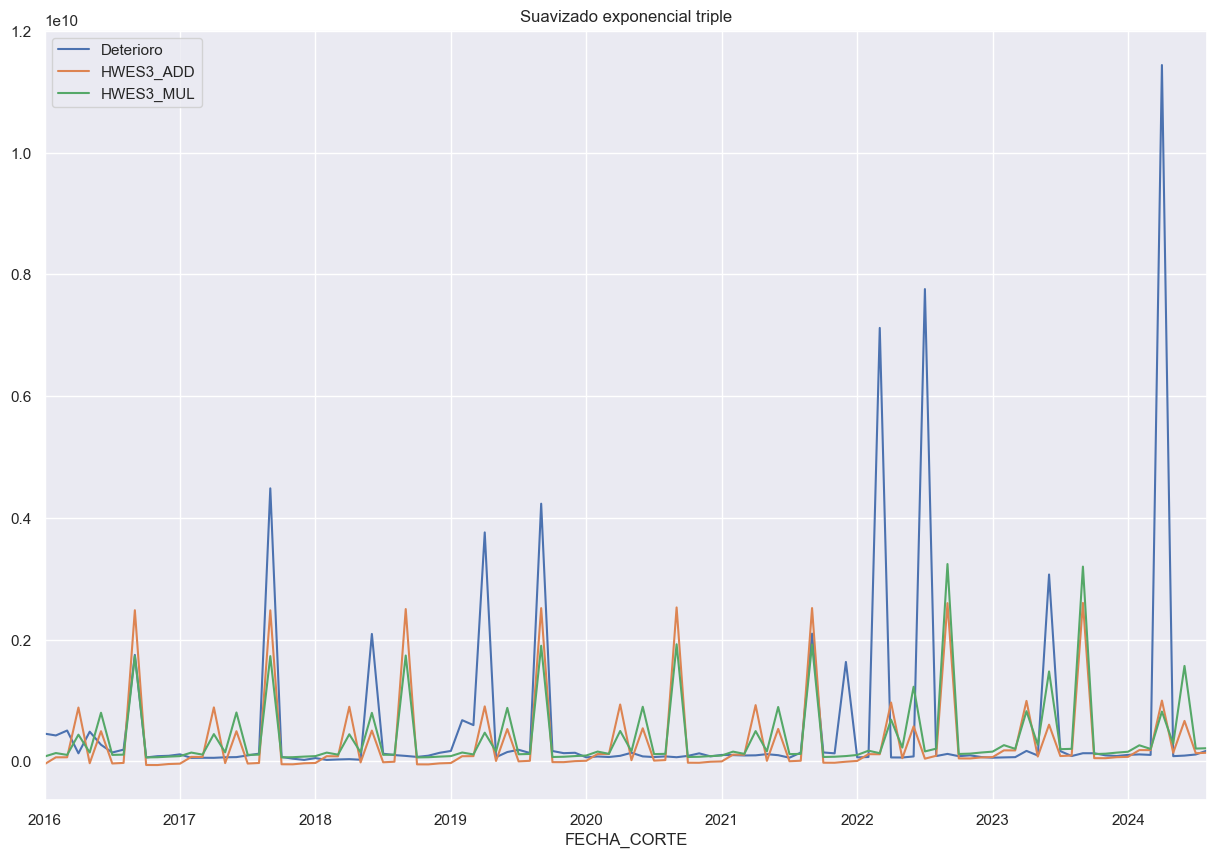

In [37]:
df_s['HWES3_ADD'] = ExponentialSmoothing(df_s['Deterioro'],trend='add',seasonal='add',seasonal_periods = 12).fit().fittedvalues
df_s['HWES3_MUL'] = ExponentialSmoothing(df_s['Deterioro'],trend='mul',seasonal='mul',seasonal_periods = 12).fit().fittedvalues
df_s[['Deterioro', 'HWES3_ADD', 'HWES3_MUL']].plot(title = 'Suavizado exponencial triple',figsize=(15,10))

In [38]:
# Partiendo los datos entre entrenamiento y prueba

Entrenamiento_df_s= df_s[:98]
Prueba_df_s= df_s[98:]

display(Prueba_df_s,Entrenamiento_df_s)

,Deterioro,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
FECHA_CORTE,,,,,,
2024-03-31,106828590,1.150211e+08,8.050665e+08,7.680889e+08,1.853166e+08,2.045391e+08
2024-04-30,11441164891,1.068696e+08,7.853302e+08,7.321364e+08,9.992271e+08,8.191814e+08
2024-05-31,86331878,1.138449e+10,1.098695e+09,1.339166e+09,1.411418e+08,2.905447e+08
2024-06-30,95378649,1.428227e+08,1.077855e+09,1.318479e+09,6.652252e+08,1.568615e+09
2024-07-31,113647065,9.561587e+07,1.057068e+09,1.295396e+09,1.343794e+08,2.107087e+08
2024-08-31,178815394,1.135569e+08,1.036627e+09,1.270631e+09,1.424121e+08,2.167477e+08


,Deterioro,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
FECHA_CORTE,,,,,,
2016-01-31,456212289,4.562123e+08,3.347485e+08,3.347485e+08,-4.564344e+07,8.034253e+07
2016-02-29,426440399,4.562123e+08,3.625779e+08,3.680950e+08,6.728442e+07,1.372355e+08
2016-03-31,507291741,4.265893e+08,3.888137e+08,4.007032e+08,6.785262e+07,1.068156e+08
2016-04-30,132621564,5.068882e+08,4.167066e+08,4.389423e+08,8.850726e+08,4.392857e+08
2016-05-31,488187217,1.344929e+08,4.328658e+08,4.561282e+08,-3.000977e+07,1.458352e+08
...,...,...,...,...,...,...
2023-10-31,134170404,1.341885e+08,9.030154e+08,9.458604e+08,5.335857e+07,1.205898e+08
2023-11-30,99262998,1.341705e+08,8.842868e+08,9.125393e+08,5.263423e+07,1.264642e+08
2023-12-31,88546646,9.943754e+07,8.644551e+08,8.766732e+08,6.943148e+07,1.443906e+08


/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


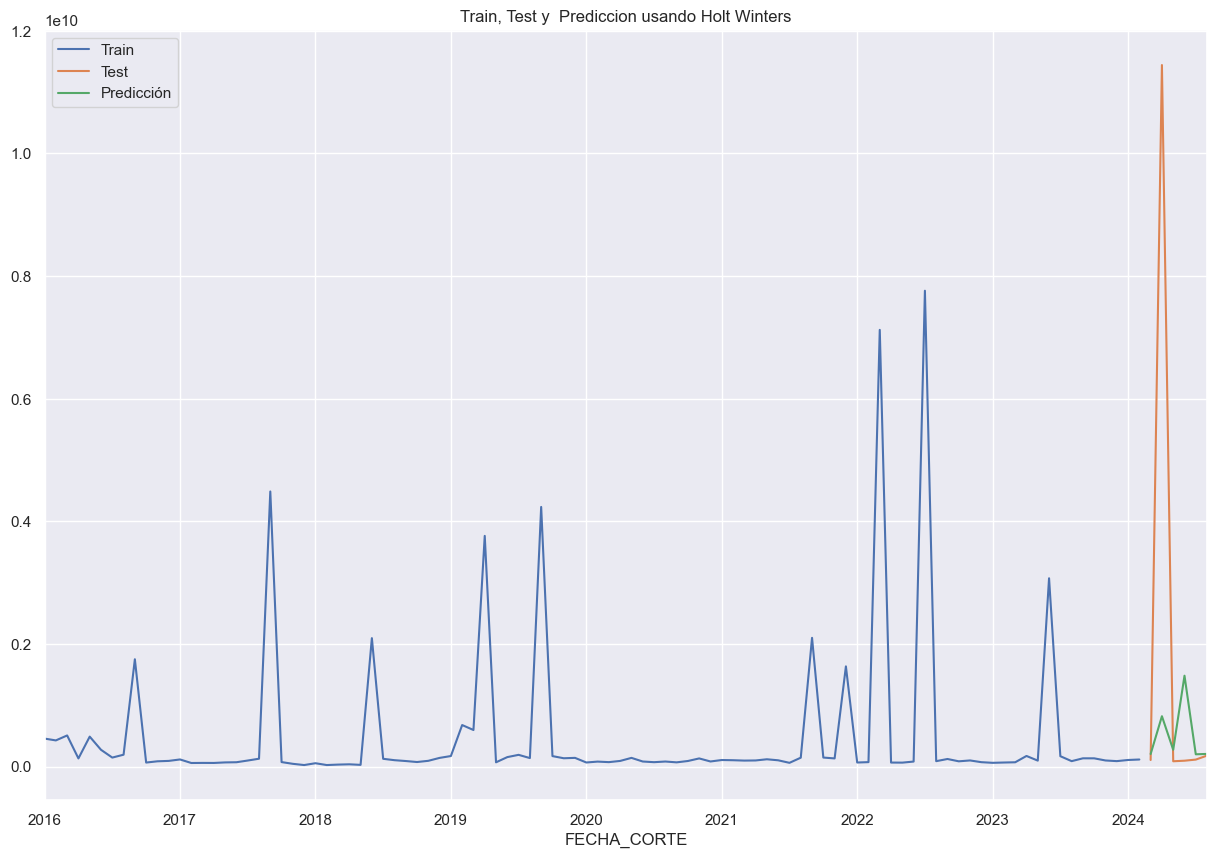

In [41]:
fitted_model = ExponentialSmoothing(Entrenamiento_df_s["Deterioro"],trend="mul",seasonal="mul",seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(6)
Entrenamiento_df_s["Deterioro"].plot(legend=True,label="Train")
Prueba_df_s["Deterioro"].plot(legend=True,label="Test",figsize=(15,10))
test_predictions.plot(legend=True,label="Predicción")
plt.title("Train, Test y  Prediccion usando Holt Winters");

<Axes: xlabel='FECHA_CORTE'>

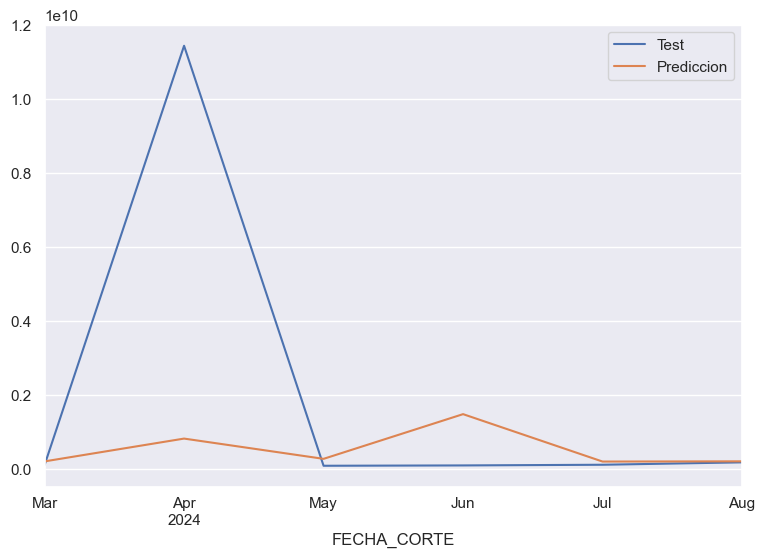

In [42]:
Prueba_df_s['Deterioro'].plot(legend=True,label="Test",figsize=(9,6))
test_predictions.plot(legend=True,label="Prediccion")

In [44]:
# Medidas

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df_s["Deterioro"],test_predictions)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df_s['Deterioro'],test_predictions):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df_s['Deterioro'],test_predictions):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df_s['Deterioro'], test_predictions)*100:.2f}%")

MAE 2067512466.42
MSE: 19126648229940064256.00
RMSE: 4373402363.14
MAPE: 324.33%


# Prophet

In [ ]:
%pip install prophet

In [45]:
df_p = df_gasto.copy()
df_p.reset_index(inplace=True)
df_p.rename(columns={'FECHA_CORTE':'ds','Deterioro':'y'}, inplace=True)
df_p

,ds,y
0,2016-01-31,456212289
1,2016-02-29,426440399
2,2016-03-31,507291741
3,2016-04-30,132621564
4,2016-05-31,488187217
...,...,...
99,2024-04-30,11441164891
100,2024-05-31,86331878
101,2024-06-30,95378649
102,2024-07-31,113647065


In [46]:
Entrenamiento_df_p= df_p[:98]
Prueba_df_p= df_p[98:]

display(Entrenamiento_df_p.tail(), Prueba_df_p.tail())

,ds,y
93,2023-10-31,134170404
94,2023-11-30,99262998
95,2023-12-31,88546646
96,2024-01-31,107205718
97,2024-02-29,115060795


,ds,y
99,2024-04-30,11441164891
100,2024-05-31,86331878
101,2024-06-30,95378649
102,2024-07-31,113647065
103,2024-08-31,178815394


In [47]:
modelo = Prophet(growth='linear')

modelo.fit(Entrenamiento_df_p)

prophet    INFO  Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
prophet    INFO  Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
cmdstanpy  DEBUG input tempfile: /tmp/tmp3p2b4s1i/tji9b0mg.json
cmdstanpy  DEBUG input tempfile: /tmp/tmp3p2b4s1i/i_kmhfym.json
cmdstanpy  DEBUG idx 0
cmdstanpy  DEBUG running CmdStan, num_threads: None
cmdstanpy  DEBUG CmdStan args: ['/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93774', 'data', 'file=/tmp/tmp3p2b4s1i/tji9b0mg.json', 'init=/tmp/tmp3p2b4s1i/i_kmhfym.json', 'output', 'file=/tmp/tmp3p2b4s1i/prophet_modelyk4y9esa/prophet_model-20241103131250.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:12:50 - cmdstanpy - INFO - Chain [1] start processing
cmdstanpy  INFO  Chain [1] start processing
13:12:50 - cmdstanpy - INFO - Chain [1] done processing
cmdstanpy  INFO  Chain [1] done processing


In [48]:
future = modelo.make_future_dataframe(periods=6,freq='MS')
forecast = modelo.predict(future)
forecast[['ds', 'yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-31,-1.398594e+07,-1.533427e+09,1.460871e+09
1,2016-02-29,1.344560e+08,-1.441458e+09,1.781046e+09
2,2016-03-31,8.030035e+08,-8.284801e+08,2.409575e+09
3,2016-04-30,9.958481e+07,-1.371316e+09,1.685226e+09
4,2016-05-31,6.440853e+08,-7.949209e+08,2.267220e+09
...,...,...,...,...
99,2024-04-01,8.267359e+08,-5.802058e+08,2.311616e+09
100,2024-05-01,-4.759043e+08,-1.978750e+09,1.025106e+09
101,2024-06-01,2.698199e+09,1.135779e+09,4.169882e+09
102,2024-07-01,-1.115157e+08,-1.632887e+09,1.363794e+09


/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


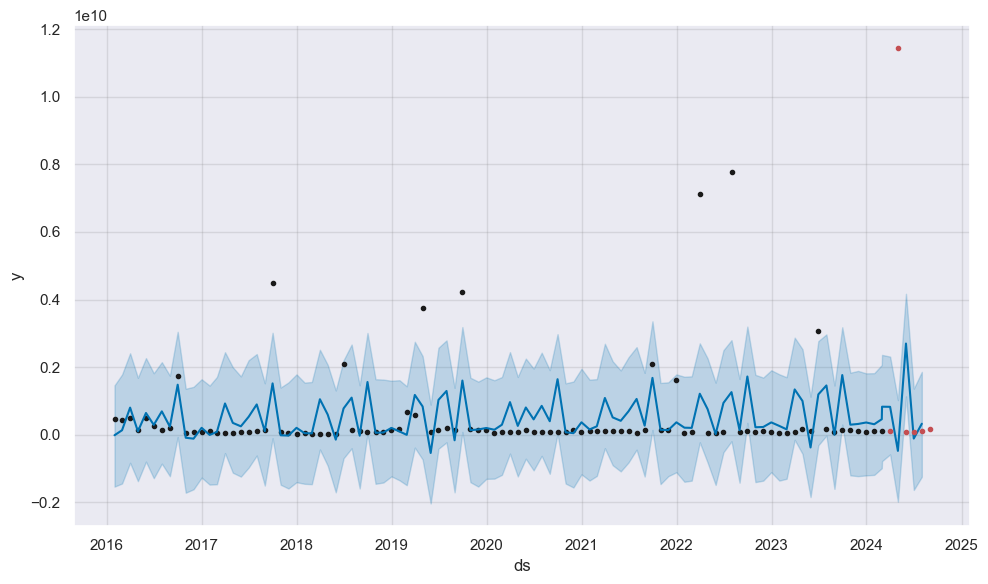

In [49]:
fig = modelo.plot(forecast)
ax = fig.gca()
ax.plot(Prueba_df_p['ds'],Prueba_df_p['y'],'r.')

/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an nda

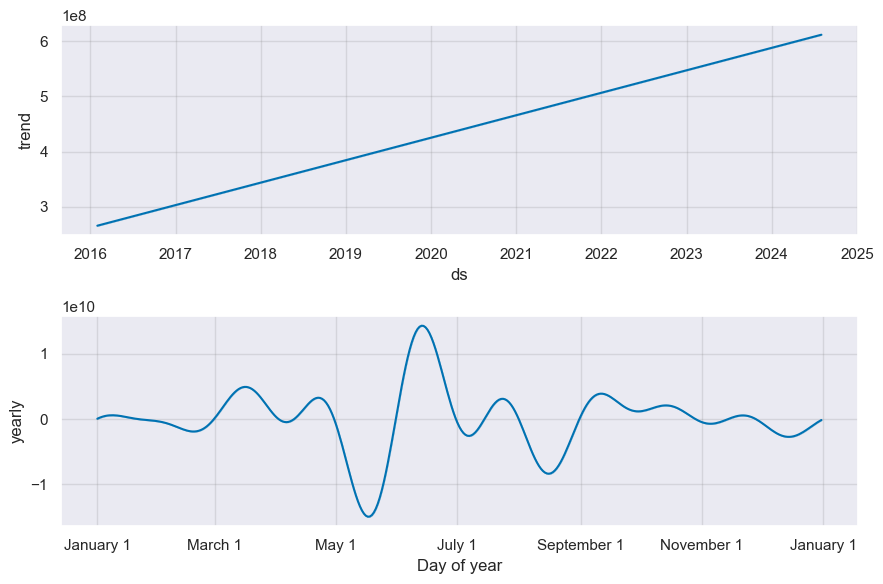

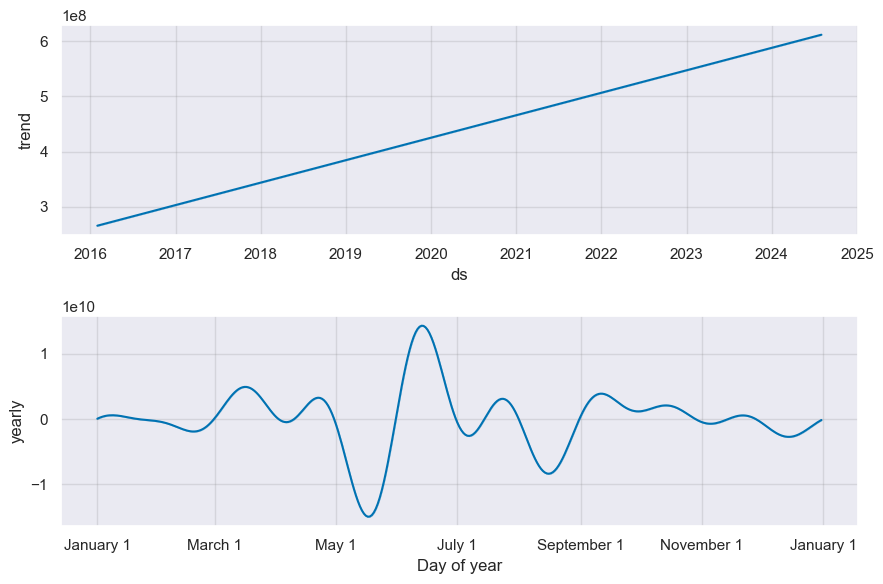

In [50]:
modelo.plot_components(forecast)

/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


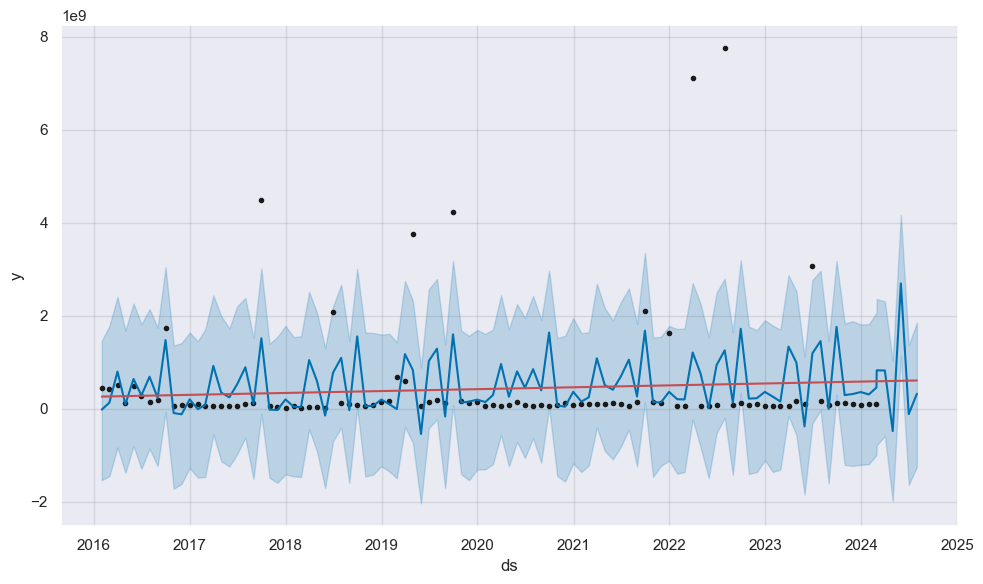

In [51]:
fig = modelo.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), modelo,forecast)

In [52]:
df_p_cv = cross_validation(modelo, initial='720 days',period='180 days',horizon='365 days')
df_p_cv

prophet    INFO  Making 11 forecasts with cutoffs between 2018-03-27 00:00:00 and 2023-03-01 00:00:00
  0%|          | 0/11 [00:00<?, ?it/s]

prophet    INFO  n_changepoints greater than number of observations. Using 19.
cmdstanpy  DEBUG input tempfile: /tmp/tmp3p2b4s1i/1j_qni99.json
cmdstanpy  DEBUG input tempfile: /tmp/tmp3p2b4s1i/vuopt5lc.json
cmdstanpy  DEBUG idx 0
cmdstanpy  DEBUG running CmdStan, num_threads: None
cmdstanpy  DEBUG CmdStan args: ['/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92730', 'data', 'file=/tmp/tmp3p2b4s1i/1j_qni99.json', 'init=/tmp/tmp3p2b4s1i/vuopt5lc.json', 'output', 'file=/tmp/tmp3p2b4s1i/prophet_modely_hcjou7/prophet_model-20241103131451.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:14:51 - cmdstanpy - INFO - Chain [1] start processing
cmdstanpy  INFO  Chain [1] start processing
13:14:51 - cmdstanpy - INFO - Chain [1] done processing
cmdstanpy  INFO  Chain [1] done processing
  9%|▉         | 1/11 [00:00<00:07,  1.42it/s]prophet    INFO  n_changepoints greater than number of observations. Using 24.
cmdstanpy  

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-03-31,7.282574e+08,4.856811e+08,9.393987e+08,32046818,2018-03-27
1,2018-04-30,8.643536e+08,6.273641e+08,1.089186e+09,36734311,2018-03-27
2,2018-05-31,1.334906e+08,-9.752765e+07,3.494758e+08,27592996,2018-03-27
3,2018-06-30,-8.142002e+07,-2.991934e+08,1.540511e+08,2094263075,2018-03-27
4,2018-07-31,-2.938225e+08,-5.320066e+08,-7.600944e+07,126444093,2018-03-27
...,...,...,...,...,...,...
127,2023-10-31,3.710065e+08,-1.095345e+09,1.845030e+09,134170404,2023-03-01
128,2023-11-30,4.066814e+08,-9.697667e+08,1.910215e+09,99262998,2023-03-01
129,2023-12-31,4.903929e+08,-1.057815e+09,1.973421e+09,88546646,2023-03-01
130,2024-01-31,5.041503e+08,-9.822934e+08,1.983386e+09,107205718,2023-03-01


In [53]:
df_per = performance_metrics(df_p_cv)
df_per

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,38 days,8.478714e+18,2.911823e+09,2.114711e+09,17.136146,14.847983,1.597491,0.153846
1,39 days,9.693351e+18,3.113415e+09,2.371482e+09,15.547490,12.107945,1.610460,0.153846
2,43 days,7.415457e+18,2.723134e+09,2.007188e+09,11.200939,4.446020,1.567614,0.230769
3,45 days,7.325758e+18,2.706614e+09,1.927014e+09,11.093595,4.446020,1.454282,0.307692
4,49 days,6.699151e+18,2.588272e+09,1.709709e+09,11.066570,4.446020,1.397445,0.384615
...,...,...,...,...,...,...,...,...
115,354 days,5.298708e+18,2.301892e+09,9.655234e+08,2.638204,1.022956,1.015080,0.692308
116,358 days,5.301386e+18,2.302474e+09,9.720318e+08,2.648164,1.022956,1.080672,0.692308
117,359 days,5.301382e+18,2.302473e+09,9.719800e+08,2.647511,1.022956,1.118942,0.692308
118,363 days,4.536996e+17,6.735722e+08,3.617068e+08,2.573143,0.668003,0.969298,0.769231


/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


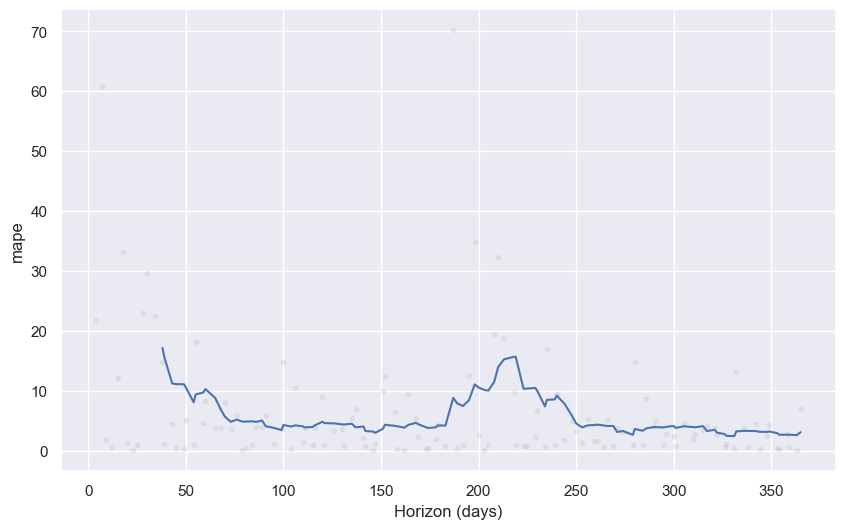

In [54]:
fig = plot_cross_validation_metric(df_p_cv, metric='mape')